In [1]:
import os

import numpy as np
import pandas as pd


In [2]:
# Fetch dataset
data_path = os.path.join(
    os.getcwd(),
    "data",
    "exportFile_irahorecka_yeast_nutrient_array_150milliminute_retention_time.csv",
)
data = pd.read_csv(data_path)
data.head(5)


,Compound Name,Formula,Mass,RT,CAS ID,[Mass] 20211026_D6_rep01,[Mass] 20211026_D5_rep01,[Mass] 20211026_D4_rep01,[Mass] 20211026_D3_rep01,[Mass] 20211026_D2_rep01,...,[Score (Tgt)] 20211026_B4_rep01,[Score (Tgt)] 20211026_B3_rep01,[Score (Tgt)] 20211026_B2_rep01,[Score (Tgt)] 20211026_B1_rep01,[Score (Tgt)] 20211026_A6_rep01,[Score (Tgt)] 20211026_A5_rep01,[Score (Tgt)] 20211026_A4_rep01,[Score (Tgt)] 20211026_A3_rep01,[Score (Tgt)] 20211026_A2_rep01,[Score (Tgt)] 20211026_A1_rep01
0,2_2_Dimethylsuccinic_acid,C6 H10 O4,146.0570,12.53,NaN,146.0569,146.0571,NaN,NaN,NaN,...,81.85,82.66,85.66,85.63,NaN,80.46,83.33,83.17,NaN,73.42
1,2_Isopropylmalic_acid,C7 H12 O5,176.0683,13.10,NaN,176.0682,176.0683,NaN,NaN,NaN,...,85.61,86.15,86.58,86.54,85.93,86.04,86.22,85.69,NaN,86.26
2,3_Methylglutaric_acid,C6 H10 O4,146.0570,12.55,NaN,146.0569,NaN,146.0573,146.0569,146.0571,...,82.56,82.66,85.66,85.17,80.24,80.46,83.33,82.99,81.03,NaN
3,3_Methyl_2_oxovaleric_acid,C6 H10 O3,130.0627,13.38,NaN,130.0627,130.0629,NaN,NaN,NaN,...,82.29,82.57,NaN,NaN,83.37,82.20,83.89,82.44,82.65,NaN
4,4_Methyl_2_oxovaleric_acid,C6 H10 O3,130.0629,13.69,NaN,130.0627,130.0629,130.0629,130.0629,130.0628,...,87.10,87.20,87.30,87.29,87.08,87.27,87.24,87.27,87.20,87.24


In [3]:
# Keep data only with area under the curve - transpose filtered dataset
data_w_area_colname = [
    colname for colname in list(data) if "Area" in colname or "Compound Name" in colname
]
data_auc = data[data_w_area_colname]
data_auc_T = data_auc.transpose().reset_index()

# Move chemical name to col header and rm old chemical name row
data_auc_T = data_auc_T.rename(columns=data_auc_T.iloc[0]).drop(data_auc_T.index[0])
data_auc_T.head(5)


,Compound Name,2_2_Dimethylsuccinic_acid,2_Isopropylmalic_acid,3_Methylglutaric_acid,3_Methyl_2_oxovaleric_acid,4_Methyl_2_oxovaleric_acid,5_Deoxy_5_methylthioadenosine,Acetyl_coenzyme_A,Adipic_acid,ADP,...,Phenylpyruvic_Acid,Phosphoenolpyruvic_acid,Pyruvic_acid,Succinic_acid,Thiamine,Aconitate,Trehalose,UDP,UMP,Uridine_5_diphosphogalactose
1,[Area] 20211026_D6_rep01,13835.0,7048255.0,13835.0,156931.0,1145221.0,NaN,54117.0,13835.0,109357.0,...,NaN,5133.0,3789354.0,3272131.0,118558.0,46693.0,4082646.0,26056.0,56111.0,3294195.0
2,[Area] 20211026_D5_rep01,25027.0,6689620.0,NaN,40412.0,1161071.0,4175.0,56691.0,NaN,97916.0,...,71623.0,18525.0,3902053.0,18202987.0,NaN,83581.0,3510953.0,29708.0,58950.0,3544258.0
3,[Area] 20211026_D4_rep01,NaN,NaN,44513.0,NaN,1151167.0,NaN,17537.0,44513.0,53460.0,...,67876.0,4535.0,3001014.0,2938807.0,28008.0,53184.0,3320313.0,11019.0,37914.0,1231302.0
4,[Area] 20211026_D3_rep01,NaN,NaN,20982.0,NaN,1218524.0,NaN,61270.0,45398.0,99601.0,...,22064.0,6752.0,5915173.0,4622168.0,124034.0,65674.0,560582.0,27187.0,66150.0,596160.0
5,[Area] 20211026_D2_rep01,NaN,NaN,12230.0,NaN,1156945.0,22210.0,41932.0,12230.0,69764.0,...,62944.0,7468.0,4401461.0,15179397.0,NaN,79919.0,532380.0,19067.0,32208.0,634219.0


In [4]:
# Group samples based on column numbers (e.g. A1 (1))
# If the grouping is not by wells, (i.e., controls, blanks) - keep name
data_auc_T["Sample Group"] = np.where(
    data_auc_T["Compound Name"].str.split("_").str[1].str[-1].str.isdigit(),
    data_auc_T["Compound Name"].str.split("_").str[1].str[-1],
    data_auc_T["Compound Name"].str.split("_").str[1],
)
data_auc_T = data_auc_T.drop(columns="Compound Name")

# Change group names (numerics 1-6) to string values
group_to_nutrient = {
    "1": "GLC | ASP",
    "2": "GLC | GLN",
    "3": "GLC | AMN",
    "4": "GAL | ASP",
    "5": "GAL | GLN",
    "6": "GAL | AMN",
}
data_auc_T = data_auc_T.replace({"Sample Group": group_to_nutrient})
data_auc_T.head(16)


,2_2_Dimethylsuccinic_acid,2_Isopropylmalic_acid,3_Methylglutaric_acid,3_Methyl_2_oxovaleric_acid,4_Methyl_2_oxovaleric_acid,5_Deoxy_5_methylthioadenosine,Acetyl_coenzyme_A,Adipic_acid,ADP,Allantoin,...,Phosphoenolpyruvic_acid,Pyruvic_acid,Succinic_acid,Thiamine,Aconitate,Trehalose,UDP,UMP,Uridine_5_diphosphogalactose,Sample Group
1,13835.0,7048255.0,13835.0,156931.0,1145221.0,NaN,54117.0,13835.0,109357.0,NaN,...,5133.0,3789354.0,3272131.0,118558.0,46693.0,4082646.0,26056.0,56111.0,3294195.0,GAL | AMN
2,25027.0,6689620.0,NaN,40412.0,1161071.0,4175.0,56691.0,NaN,97916.0,3248.0,...,18525.0,3902053.0,18202987.0,NaN,83581.0,3510953.0,29708.0,58950.0,3544258.0,GAL | GLN
3,NaN,NaN,44513.0,NaN,1151167.0,NaN,17537.0,44513.0,53460.0,18928.0,...,4535.0,3001014.0,2938807.0,28008.0,53184.0,3320313.0,11019.0,37914.0,1231302.0,GAL | ASP
4,NaN,NaN,20982.0,NaN,1218524.0,NaN,61270.0,45398.0,99601.0,NaN,...,6752.0,5915173.0,4622168.0,124034.0,65674.0,560582.0,27187.0,66150.0,596160.0,GLC | AMN
5,NaN,NaN,12230.0,NaN,1156945.0,22210.0,41932.0,12230.0,69764.0,16053.0,...,7468.0,4401461.0,15179397.0,NaN,79919.0,532380.0,19067.0,32208.0,634219.0,GLC | GLN
6,50483.0,6770944.0,50483.0,NaN,1314378.0,NaN,51753.0,50483.0,83636.0,10328.0,...,10655.0,6355289.0,3646201.0,110940.0,147222.0,463365.0,24647.0,64407.0,822228.0,GLC | ASP
7,13471.0,36763.0,13471.0,NaN,1144024.0,NaN,2153.0,13471.0,NaN,NaN,...,353.0,37477.0,747004.0,46685.0,NaN,17260.0,NaN,8811.0,NaN,CTRL
8,NaN,NaN,20445.0,156550.0,1163253.0,NaN,1164.0,20445.0,NaN,NaN,...,874.0,21256.0,2306267.0,40706.0,10725.0,NaN,NaN,16656.0,NaN,CTRL
9,NaN,NaN,NaN,NaN,1200853.0,NaN,47032.0,NaN,78173.0,NaN,...,4033.0,1001987.0,2090159.0,53435.0,34076.0,3743006.0,16750.0,35339.0,2589757.0,GAL | AMN
10,43072.0,6921602.0,43072.0,NaN,1186320.0,NaN,54311.0,43072.0,101896.0,4850.0,...,17999.0,3896548.0,18329668.0,6073.0,66112.0,3804764.0,30173.0,59886.0,3252327.0,GAL | GLN


In [5]:
# Convert object dtype to numeric, if possible
data_auc_T = data_auc_T.apply(pd.to_numeric, errors="ignore")

# Aggregate samples from 'Sample Group' col and find mean
data_auc_T_mean = data_auc_T.groupby(["Sample Group"]).agg("mean")
data_auc_T_std = data_auc_T.groupby(["Sample Group"]).agg("std")
data_auc_T_cv = data_auc_T_std.div(data_auc_T_mean).reset_index()
data_auc_T_mean.head(10)


,2_2_Dimethylsuccinic_acid,2_Isopropylmalic_acid,3_Methylglutaric_acid,3_Methyl_2_oxovaleric_acid,4_Methyl_2_oxovaleric_acid,5_Deoxy_5_methylthioadenosine,Acetyl_coenzyme_A,Adipic_acid,ADP,Allantoin,...,Phenylpyruvic_Acid,Phosphoenolpyruvic_acid,Pyruvic_acid,Succinic_acid,Thiamine,Aconitate,Trehalose,UDP,UMP,Uridine_5_diphosphogalactose
Sample Group,,,,,,,,,,,,,,,,,,,,,
Blank,190485.000000,9668216.50,197673.000000,NaN,1303023.50,57216.000000,2919.50,197673.000000,10343.00,NaN,...,NaN,13598.50,NaN,5627150.00,37745.0,20608.00,454260.50,16224.00,225390.50,46851.50
CTRL,13471.000000,36763.00,16958.000000,156550.0,1153638.50,NaN,1658.50,16958.000000,NaN,NaN,...,NaN,613.50,29366.50,1526635.50,43695.5,10725.00,17260.00,NaN,12733.50,NaN
GAL | AMN,17701.000000,6940465.00,19865.333333,168953.0,1193861.00,NaN,51972.50,19865.333333,90758.25,NaN,...,25384.00,5093.50,3163884.75,2776248.50,98793.5,36185.00,3675153.75,19820.00,58195.25,2864701.75
GAL | ASP,18208.000000,6945273.50,30184.333333,143363.0,1189715.25,NaN,33688.75,27888.750000,95248.50,9473.00,...,74372.25,8254.25,4421436.00,3191528.00,47901.0,69505.75,3384401.50,18828.00,62255.25,2470874.75
GAL | GLN,30329.333333,6887791.00,32980.500000,102695.0,1203505.75,4955.333333,52193.00,32980.500000,111761.25,5769.75,...,70931.50,16119.25,3922016.75,17560731.75,7067.5,69605.50,3575055.00,30877.50,67084.50,3442662.50
GLC | AMN,25208.500000,6816620.00,22409.750000,153727.0,1196674.75,NaN,59913.25,25817.250000,91312.50,NaN,...,21353.25,6620.75,5000694.75,4287572.50,105641.5,69872.25,487535.25,24462.50,70683.75,523384.75
GLC | ASP,30361.750000,6695874.25,36671.333333,NaN,1197790.25,NaN,42217.75,36671.333333,82796.75,11165.75,...,69304.25,10149.75,6113354.00,3179491.50,62274.5,140591.50,433192.00,24519.00,73324.00,648217.75
GLC | GLN,24810.000000,6271288.00,30895.250000,161841.0,1190848.50,20071.750000,47175.00,30895.250000,73447.25,7819.00,...,61944.75,8802.75,4195891.50,14674641.00,110815.0,77568.50,433325.50,20545.25,50916.00,678529.25


In [6]:
# Make copy of data table to avoid manipulation by reference
data_auc_T_norm = data_auc_T_mean.copy().reset_index()

# TODO
# Nullify values if value less than blank value
# data_auc_T_norm.loc[:,'2_2_Dimethylsuccinic_acid':] = data_auc_T_norm.loc[:,'2_2_Dimethylsuccinic_acid':].sub(data_auc_T_norm.iloc[-2]['2_2_Dimethylsuccinic_acid':])

# Remove blank row and CTRL
data_auc_T_norm = data_auc_T_norm.drop([0, 1], axis=0)

# Divide groups 1-6 by group 3 (i.e. our control) to get relative expression diff
data_auc_T_norm.loc[:, "2_2_Dimethylsuccinic_acid":] = data_auc_T_norm.loc[
    :, "2_2_Dimethylsuccinic_acid":
].div(data_auc_T_norm.iloc[3]["2_2_Dimethylsuccinic_acid":])

# Non-float - rm
data_auc_T_norm = data_auc_T_norm.set_index("Sample Group")
data_auc_T_norm

# Re-apply float data type
data_auc_T_norm = data_auc_T_norm.astype(float)


In [7]:
# BLOCK TO TAKE LOG10 OF VALUES AND CREATE TEMPORARY SUMMARY ROW
# OMIT


# # Convert to log10
# data_auc_T_norm_log10 = np.log10(data_auc_T_norm)
# # Remove inf / -inf and replace NaN with 0
# data_auc_T_norm_log10.replace([np.inf, -np.inf], np.nan, inplace=True)
# data_auc_T_norm_log10 = data_auc_T_norm_log10.fillna(0)
# # Drop control group (3)
# data_auc_T_norm_log10 = data_auc_T_norm_log10.drop(2, axis=0)

# # Append final row with sum of all changes from control
# data_auc_T_norm_log10 = data_auc_T_norm_log10.append(data_auc_T_norm_log10.sum(numeric_only=True), ignore_index=True)
# # Sort columns from this summary row
# new_columns = data_auc_T_norm_log10.columns[data_auc_T_norm_log10.iloc[data_auc_T_norm_log10.last_valid_index()].argsort()]
# # Reassign sorted df and reverse order
# data_auc_T_norm_log10 = data_auc_T_norm_log10[new_columns]
# data_auc_T_norm_log10 = data_auc_T_norm_log10[data_auc_T_norm_log10.columns[::-1]]
# # Rm final row
# data_auc_T_norm_log10 = data_auc_T_norm_log10[:-1]
# data_auc_T_norm_log10 = data_auc_T_norm_log10.drop(3, axis=0)


In [8]:
# GRAPHING
import seaborn as sns

sns.set_theme()
sns.set(rc={"figure.figsize": (100, 10), "font.size": 20})


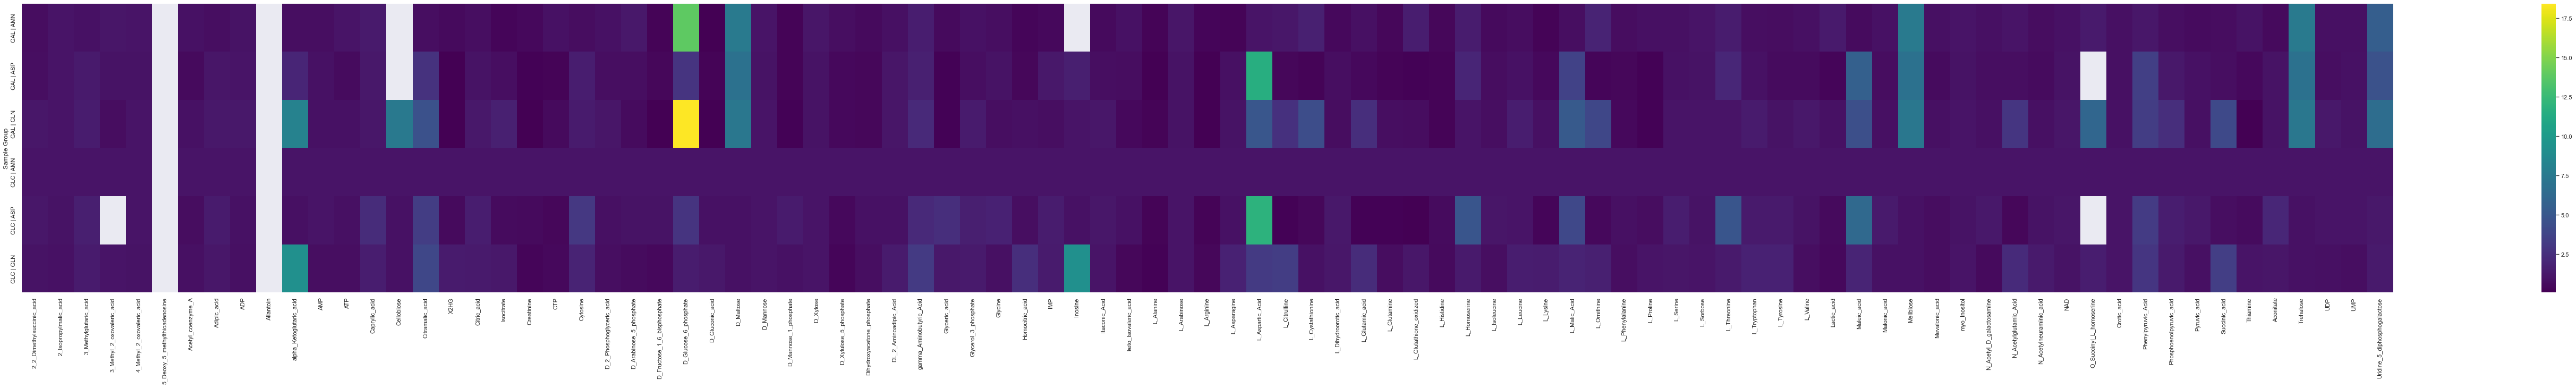

In [9]:
ax = sns.heatmap(data_auc_T_norm, cmap="viridis", label="big")


In [10]:
data_auc_T_norm


,2_2_Dimethylsuccinic_acid,2_Isopropylmalic_acid,3_Methylglutaric_acid,3_Methyl_2_oxovaleric_acid,4_Methyl_2_oxovaleric_acid,5_Deoxy_5_methylthioadenosine,Acetyl_coenzyme_A,Adipic_acid,ADP,Allantoin,...,Phenylpyruvic_Acid,Phosphoenolpyruvic_acid,Pyruvic_acid,Succinic_acid,Thiamine,Aconitate,Trehalose,UDP,UMP,Uridine_5_diphosphogalactose
Sample Group,,,,,,,,,,,,,,,,,,,,,
GAL | AMN,0.702184,1.018168,0.886459,1.099046,0.997649,NaN,0.867463,0.769460,0.993930,NaN,...,1.188765,0.769324,0.632689,0.647511,0.935177,0.517874,7.538232,0.810220,0.823319,5.473415
GAL | ASP,0.722296,1.018874,1.346929,0.932582,0.994184,NaN,0.562292,1.080237,1.043105,NaN,...,3.482948,1.246724,0.884164,0.744367,0.453430,0.994755,6.941860,0.769668,0.880758,4.720953
GAL | GLN,1.203139,1.010441,1.471703,0.668035,1.005708,NaN,0.871143,1.277460,1.223943,NaN,...,3.321813,2.434656,0.784294,4.095728,0.066901,0.996182,7.332916,1.262238,0.949080,6.577690
GLC | AMN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
GLC | ASP,1.204425,0.982287,1.636401,NaN,1.000932,NaN,0.704648,1.420420,0.906741,NaN,...,3.245607,1.533021,1.222501,0.741560,0.589489,2.012122,0.888535,1.002310,1.037353,1.238511
GLC | GLN,0.984192,0.920000,1.378652,1.052782,0.995131,NaN,0.787388,1.196690,0.804350,NaN,...,2.900952,1.329570,0.839062,3.422599,1.048972,1.110147,0.888809,0.839867,0.720335,1.296425


In [11]:
# Drop control row
data_auc_T_norm = data_auc_T_norm.drop(index="GLC | AMN")

# Get a chance to see the upper echelon of clustering (> 0)
# up_regulated = sns.clustermap(data_auc_T_norm.fillna(0), vmin=0)
d = data_auc_T_norm[data_auc_T_norm.fillna(0).astype(int) != 0]
d = d.dropna(axis=1, how="all")

# down_regulated = sns.clustermap(d.fillna(0).T, vmax=0)
# down_regulated.savefig('myfile2.png')

# all_ = sns.clustermap(data_auc_T_norm.fillna(0))


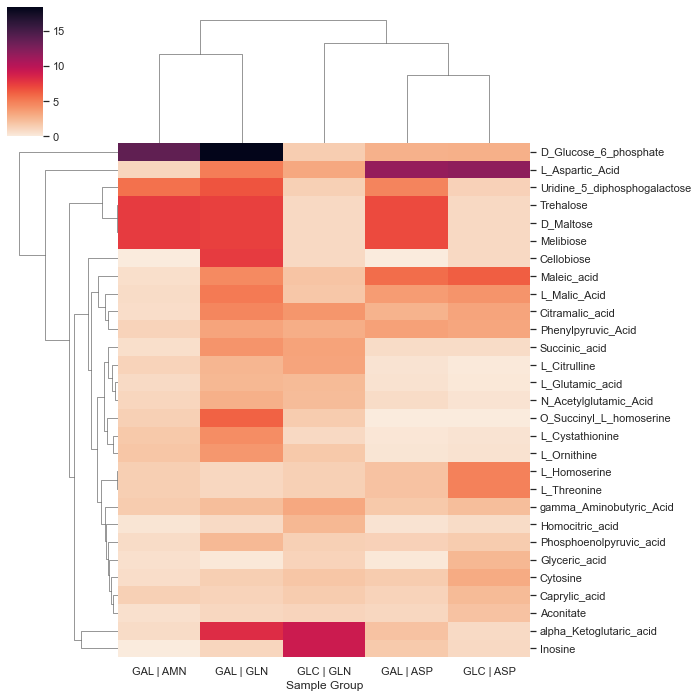

In [12]:
# Refine the most important hits by omitting values that did not have a magnitude change in either way
d = data_auc_T_norm[data_auc_T_norm.fillna(0).astype(int) != 0]
d = d.dropna(axis=1, how="all")
# list(d)
cols_to_keep = [
    "alpha_Ketoglutaric_acid",
    "Caprylic_acid",
    "Cellobiose",
    "Citramalic_acid",
    "Cytosine",
    "D_Glucose_6_phosphate",
    "D_Maltose",
    "gamma_Aminobutyric_Acid",
    "Glyceric_acid",
    "Homocitric_acid",
    "Inosine",
    "L_Aspartic_Acid",
    "L_Citrulline",
    "L_Cystathionine",
    "L_Glutamic_acid",
    "L_Homoserine",
    "L_Malic_Acid",
    "L_Ornithine",
    "L_Threonine",
    "Maleic_acid",
    "Melibiose",
    "N_Acetylglutamic_Acid",
    "O_Succinyl_L_homoserine",
    "Phenylpyruvic_Acid",
    "Phosphoenolpyruvic_acid",
    "Succinic_acid",
    "Aconitate",
    "Trehalose",
    "Uridine_5_diphosphogalactose",
]
# Select the ones you want
condensed = data_auc_T_norm[cols_to_keep]
down_regulated = sns.clustermap(condensed.fillna(0).T, cmap="rocket_r")
down_regulated.savefig("downregulated.eps", format="eps")


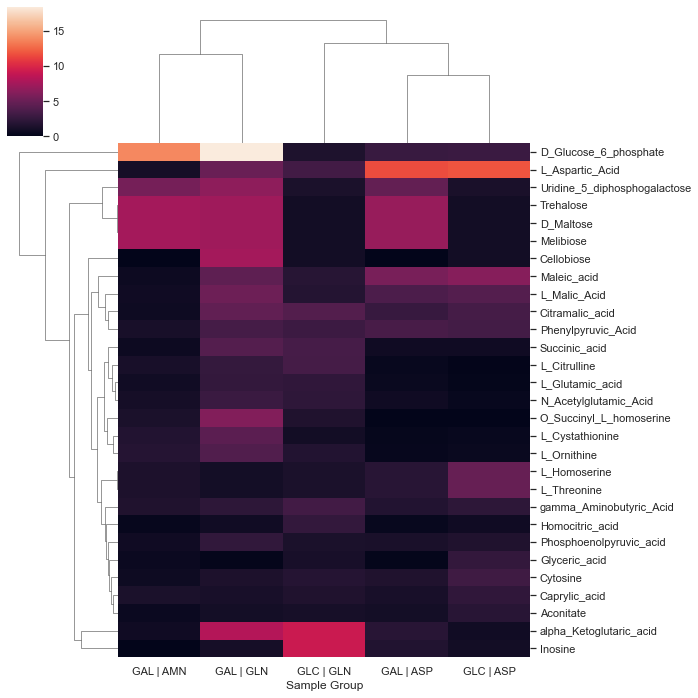

In [13]:
up_regulated = sns.clustermap(condensed.fillna(0).T, vmin=0)


In [14]:
# Export figure
fig = ax.get_figure()
fig.savefig(os.path.join(os.getcwd(), "myfile.png"))


In [15]:
%%bash


UsageError: %%bash is a cell magic, but the cell body is empty.


In [16]:
# FOR EXPORT OF ANALYSIS FILE SUMMARY FOR OLGA


In [17]:
import os

import numpy as np
import pandas as pd


In [18]:
sum_data = pd.read_csv(
    os.path.join(os.getcwd(), "data", "agilent_masshunter_nutrient_array_data_layout.csv")
)
sum_data.head()


,Sample Name,Sample Position,Data File
0,StartUP,P1-F9,20211026_StartUP.d
1,Blank_01,P1-F9,20211026_Blank_01.d
2,Blank_02,P1-F9,20211026_Blank_02.d
3,A1_rep01,P1-A1,20211026_A1_rep01.d
4,HomoSerine,P2-A1,20211026_HomoSerine.d


In [19]:
row_nutrient_map = {
    "A": "biological_replicate_1",
    "B": "biological_replicate_2",
    "C": "biological_replicate_3",
    "D": "biological_replicate_4",
}

col_nitrogen_map = {
    "1": "ASP",
    "2": "GLN",
    "3": "AMN",
    "4": "ASP",
    "5": "GLN",
    "6": "AMN",
}

col_carbon_map = {
    "1": "GLC",
    "2": "GLC",
    "3": "GLC",
    "4": "GAL",
    "5": "GAL",
    "6": "GAL",
}


def map_ternary_exp_and_replace_values(df, ternary_cond, new_colname):
    """Assesses ternary pattern (`ternary_cond`) and maps to `np.where`.
    Assigns output column to `new_colname`."""
    df[new_colname] = np.where(*ternary_cond)
    return df


def map_dict_and_replace_values(df, colname, dict_map):
    return df.replace({colname: dict_map})


# Replace col values with appropriate nutrient labels
col_ternary_exp = [
    sum_data["Sample Name"].str.split("_").str[0].str[-1].str.isdigit(),
    sum_data["Sample Name"].str.split("_").str[0].str[-1],
    np.nan,
]
# Relabel nitrogen source
df = map_ternary_exp_and_replace_values(sum_data, col_ternary_exp, new_colname="Nitrogen Source")
df = map_dict_and_replace_values(df, colname="Nitrogen Source", dict_map=col_nitrogen_map)
# Relabel carbon source
df = map_ternary_exp_and_replace_values(df, col_ternary_exp, new_colname="Carbon Source")
df = map_dict_and_replace_values(df, colname="Carbon Source", dict_map=col_carbon_map)

# Replace row values with appropriate replicate labels
row_ternary_exp = [
    sum_data["Sample Name"].str.split("_").str[0].str[:2].str[-1].str.isdigit(),
    sum_data["Sample Name"].str.split("_").str[0].str[0],
    np.nan,
]
df = map_ternary_exp_and_replace_values(df, row_ternary_exp, new_colname="Replicates")
df = map_dict_and_replace_values(df, colname="Replicates", dict_map=row_nutrient_map)

df


,Sample Name,Sample Position,Data File,Nitrogen Source,Carbon Source,Replicates
0,StartUP,P1-F9,20211026_StartUP.d,NaN,NaN,NaN
1,Blank_01,P1-F9,20211026_Blank_01.d,NaN,NaN,NaN
2,Blank_02,P1-F9,20211026_Blank_02.d,NaN,NaN,NaN
3,A1_rep01,P1-A1,20211026_A1_rep01.d,ASP,GLC,biological_replicate_1
4,HomoSerine,P2-A1,20211026_HomoSerine.d,NaN,NaN,NaN
5,A2_rep01,P1-A2,20211026_A2_rep01.d,GLN,GLC,biological_replicate_1
6,AcetylCoA,P2-A2,20211026_AcetylCoA.d,NaN,NaN,NaN
7,A3_rep01,P1-A3,20211026_A3_rep01.d,AMN,GLC,biological_replicate_1
8,SuccCoA,P2-A3,20211026_SuccCoA.d,NaN,NaN,NaN
9,A4_rep01,P1-A4,20211026_A4_rep01.d,ASP,GAL,biological_replicate_1


In [20]:
df.to_csv(
    os.path.join(
        os.getcwd(), "data", "2021-10-26_IH_agilent_masshunter_nutrient_array_sample_layout.csv"
    ),
    index=False,
)


In [21]:
# Link vials in timsTOF to sample id


In [22]:
import os

import numpy as np
import pandas as pd


In [23]:
tims_df = pd.read_csv(os.path.join(os.getcwd(), "data", "2021-11-02_timsTOF_sample_layout.csv"))
tims_df.head()


,HPLC VIAL COORDINATES,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,1,2,3,4,5,6
1,A,103,104,105,106,107,108
2,B,91,92,93,94,95,96
3,C,79,80,81,82,83,84
4,D,67,68,69,70,71,72


In [24]:
# General purpose functions
def mv_row_as_header(df, row_idx):
    """Moves row as dataframe header of df indicated by `row_idx`.
    Drops row name row once complete."""
    return df.rename(columns=df.iloc[row_idx]).drop(df.index[row_idx])


def mv_row_as_header_and_def_index(*args, index_col=np.nan):
    df = mv_row_as_header(*args)
    return df.set_index(index_col)


In [25]:
hplc_coord = tims_df.iloc[:10, :]
hplc_coord = mv_row_as_header_and_def_index(hplc_coord, 0, index_col=np.nan)
hplc_coord


,1,2,3,4,5,6
nan,,,,,,
A,103,104,105,106,107,108
B,91,92,93,94,95,96
C,79,80,81,82,83,84
D,67,68,69,70,71,72
E,55,56,57,58,59,60
F,43,44,45,46,47,48
G,31,32,33,34,35,36
H,19,20,21,22,23,24
I,7,8,9,10,NaN,12


In [26]:
output_sample_id = tims_df.iloc[12:22, :]
output_sample_id = mv_row_as_header_and_def_index(output_sample_id, 0, index_col=np.nan)
output_sample_id


,1,2,3,4,5,6
nan,,,,,,
A,IH_Met_Vial103_001,IH_Met_Vial104_002,IH_Met_Vial105_003,IH_Met_Vial106_004,IH_Met_Vial107_005,IH_Met_Vial108_006
B,IH_Met_Vial91_007,IH_Met_Vial92_008,IH_Met_Vial93_009,IH_Met_Vial94_010,IH_Met_Vial95_011,IH_Met_Vial96_012
C,IH_Met_Vial79_013,IH_Met_Vial80_014,IH_Met_Vial81_015,IH_Met_Vial82_016,IH_Met_Vial83_017,IH_Met_Vial84_018
D,IH_Met_Vial67_019,IH_Met_Vial68_020,IH_Met_Vial69_021,IH_Met_Vial70_022,IH_Met_Vial71_023,IH_Met_Vial72_024
E,IH_Met_Vial55_025,IH_Met_Vial56_026,IH_Met_Vial57_027,IH_Met_Vial58_028,IH_Met_Vial59_029,IH_Met_Vial60_030
F,IH_Met_Vial43_031,IH_Met_Vial44_032,IH_Met_Vial45_033,IH_Met_Vial46_034,IH_Met_Vial47_035,IH_Met_Vial48_036
G,IH_Met_Vial31_037,IH_Met_Vial32_038,IH_Met_Vial33_039,IH_Met_Vial34_040,IH_Met_Vial35_041,IH_Met_Vial36_042
H,IH_Met_Vial19_043,IH_Met_Vial20_044,IH_Met_Vial21_045,IH_Met_Vial22_046,IH_Met_Vial23_047,IH_Met_Vial24_048
I,IH_Met_Vial7_049,IH_Met_Vial8_050,IH_Met_Vial9_051,IH_Met_Vial10_052,NaN,IH_Met_Vial12_BLANK02


In [27]:
output_sample_name = tims_df.iloc[24:, :]
output_sample_name = mv_row_as_header_and_def_index(output_sample_name, 0, index_col=np.nan)
output_sample_name


,1,2,3,4,5,6
nan,,,,,,
A,HoSer,AceCoA,SucCoA,TetHF,GDP,ATP
B,Mal,Suc,Gal,Pyr,Asp,Cit
C,Isc,4-Am-But,SucSeAd,Glc,N-A-Glut,Fum
D,Orn,Glu,AlphaKeto,Met,BetaAla,STDPool
E,STDPool+YE,LC-MS-H2O+YE,A1,A2,A3,A4
F,A5,A6,B1,B2,B3,B4
G,B5,B6,C1,C2,C3,C4
H,C5,C6,D1,D2,D3,D4
I,D5,D6,CTRL-F,CTRL-S,NaN,LC-MS-H2O-BLANK


In [28]:
output_sample_pair = output_sample_id + "_" + output_sample_name
output_sample_pair


,1,2,3,4,5,6
nan,,,,,,
A,IH_Met_Vial103_001_HoSer,IH_Met_Vial104_002_AceCoA,IH_Met_Vial105_003_SucCoA,IH_Met_Vial106_004_TetHF,IH_Met_Vial107_005_GDP,IH_Met_Vial108_006_ATP
B,IH_Met_Vial91_007_Mal,IH_Met_Vial92_008_Suc,IH_Met_Vial93_009_Gal,IH_Met_Vial94_010_Pyr,IH_Met_Vial95_011_Asp,IH_Met_Vial96_012_Cit
C,IH_Met_Vial79_013_Isc,IH_Met_Vial80_014_4-Am-But,IH_Met_Vial81_015_SucSeAd,IH_Met_Vial82_016_Glc,IH_Met_Vial83_017_N-A-Glut,IH_Met_Vial84_018_Fum
D,IH_Met_Vial67_019_Orn,IH_Met_Vial68_020_Glu,IH_Met_Vial69_021_AlphaKeto,IH_Met_Vial70_022_Met,IH_Met_Vial71_023_BetaAla,IH_Met_Vial72_024_STDPool
E,IH_Met_Vial55_025_STDPool+YE,IH_Met_Vial56_026_LC-MS-H2O+YE,IH_Met_Vial57_027_A1,IH_Met_Vial58_028_A2,IH_Met_Vial59_029_A3,IH_Met_Vial60_030_A4
F,IH_Met_Vial43_031_A5,IH_Met_Vial44_032_A6,IH_Met_Vial45_033_B1,IH_Met_Vial46_034_B2,IH_Met_Vial47_035_B3,IH_Met_Vial48_036_B4
G,IH_Met_Vial31_037_B5,IH_Met_Vial32_038_B6,IH_Met_Vial33_039_C1,IH_Met_Vial34_040_C2,IH_Met_Vial35_041_C3,IH_Met_Vial36_042_C4
H,IH_Met_Vial19_043_C5,IH_Met_Vial20_044_C6,IH_Met_Vial21_045_D1,IH_Met_Vial22_046_D2,IH_Met_Vial23_047_D3,IH_Met_Vial24_048_D4
I,IH_Met_Vial7_049_D5,IH_Met_Vial8_050_D6,IH_Met_Vial9_051_CTRL-F,IH_Met_Vial10_052_CTRL-S,NaN,IH_Met_Vial12_BLANK02_LC-MS-H2O-BLANK


In [29]:
mapped_sample_keys = pd.read_csv(
    os.path.join(
        os.getcwd(), "data", "2021-10-26_IH_agilent_masshunter_nutrient_array_sample_layout.csv"
    )
)
tidy_mapped_samples = mapped_sample_keys.dropna()
tidy_mapped_samples


,Sample Name,Sample Position,Data File,Nitrogen Source,Carbon Source,Replicates
3,A1_rep01,P1-A1,20211026_A1_rep01.d,ASP,GLC,biological_replicate_1
5,A2_rep01,P1-A2,20211026_A2_rep01.d,GLN,GLC,biological_replicate_1
7,A3_rep01,P1-A3,20211026_A3_rep01.d,AMN,GLC,biological_replicate_1
9,A4_rep01,P1-A4,20211026_A4_rep01.d,ASP,GAL,biological_replicate_1
11,A5_rep01,P1-A5,20211026_A5_rep01.d,GLN,GAL,biological_replicate_1
13,A6_rep01,P1-A6,20211026_A6_rep01.d,AMN,GAL,biological_replicate_1
15,B1_rep01,P1-A7,20211026_B1_rep01.d,ASP,GLC,biological_replicate_2
17,B2_rep01,P1-A8,20211026_B2_rep01.d,GLN,GLC,biological_replicate_2
19,B3_rep01,P1-A9,20211026_B3_rep01.d,AMN,GLC,biological_replicate_2
21,B4_rep01,P1-B1,20211026_B4_rep01.d,ASP,GAL,biological_replicate_2


In [30]:
# See if you can merge tail well coord with rows in well coord in tidy_mapped_samples
tidy_mapped_samples["Condensed Info"] = (
    tidy_mapped_samples["Nitrogen Source"]
    + "_"
    + tidy_mapped_samples["Carbon Source"]
    + "_"
    + tidy_mapped_samples["Replicates"]
)
tidy_mapped_samples["Well Coord"] = tidy_mapped_samples["Sample Name"].str.split("_").str[0]
well_mapped_dict = pd.Series(
    tidy_mapped_samples["Condensed Info"].values, index=tidy_mapped_samples["Well Coord"]
).to_dict()
well_mapped_dict


/var/folders/qk/0d5w_j9s6t995z3rw3hfgjmm0000gn/T/ipykernel_44851/1187471540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_mapped_samples["Condensed Info"] = tidy_mapped_samples['Nitrogen Source'] + "_" + tidy_mapped_samples['Carbon Source'] + "_" + tidy_mapped_samples['Replicates']
/var/folders/qk/0d5w_j9s6t995z3rw3hfgjmm0000gn/T/ipykernel_44851/1187471540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_mapped_samples["Well Coord"] = tidy_mapped_samples['Sample Name'].str.split('_').str[

{'A1': 'ASP_GLC_biological_replicate_1',
 'A2': 'GLN_GLC_biological_replicate_1',
 'A3': 'AMN_GLC_biological_replicate_1',
 'A4': 'ASP_GAL_biological_replicate_1',
 'A5': 'GLN_GAL_biological_replicate_1',
 'A6': 'AMN_GAL_biological_replicate_1',
 'B1': 'ASP_GLC_biological_replicate_2',
 'B2': 'GLN_GLC_biological_replicate_2',
 'B3': 'AMN_GLC_biological_replicate_2',
 'B4': 'ASP_GAL_biological_replicate_2',
 'B5': 'GLN_GAL_biological_replicate_2',
 'B6': 'AMN_GAL_biological_replicate_2',
 'C1': 'ASP_GLC_biological_replicate_3',
 'C2': 'GLN_GLC_biological_replicate_3',
 'C3': 'AMN_GLC_biological_replicate_3',
 'C4': 'ASP_GAL_biological_replicate_3',
 'C5': 'GLN_GAL_biological_replicate_3',
 'C6': 'AMN_GAL_biological_replicate_3',
 'D1': 'ASP_GLC_biological_replicate_4',
 'D2': 'GLN_GLC_biological_replicate_4',
 'D3': 'AMN_GLC_biological_replicate_4',
 'D4': 'ASP_GAL_biological_replicate_4',
 'D5': 'GLN_GAL_biological_replicate_4',
 'D6': 'AMN_GAL_biological_replicate_4'}

In [31]:
# Now replace master sample coordinate with info from dict
output_sample_pair


,1,2,3,4,5,6
nan,,,,,,
A,IH_Met_Vial103_001_HoSer,IH_Met_Vial104_002_AceCoA,IH_Met_Vial105_003_SucCoA,IH_Met_Vial106_004_TetHF,IH_Met_Vial107_005_GDP,IH_Met_Vial108_006_ATP
B,IH_Met_Vial91_007_Mal,IH_Met_Vial92_008_Suc,IH_Met_Vial93_009_Gal,IH_Met_Vial94_010_Pyr,IH_Met_Vial95_011_Asp,IH_Met_Vial96_012_Cit
C,IH_Met_Vial79_013_Isc,IH_Met_Vial80_014_4-Am-But,IH_Met_Vial81_015_SucSeAd,IH_Met_Vial82_016_Glc,IH_Met_Vial83_017_N-A-Glut,IH_Met_Vial84_018_Fum
D,IH_Met_Vial67_019_Orn,IH_Met_Vial68_020_Glu,IH_Met_Vial69_021_AlphaKeto,IH_Met_Vial70_022_Met,IH_Met_Vial71_023_BetaAla,IH_Met_Vial72_024_STDPool
E,IH_Met_Vial55_025_STDPool+YE,IH_Met_Vial56_026_LC-MS-H2O+YE,IH_Met_Vial57_027_A1,IH_Met_Vial58_028_A2,IH_Met_Vial59_029_A3,IH_Met_Vial60_030_A4
F,IH_Met_Vial43_031_A5,IH_Met_Vial44_032_A6,IH_Met_Vial45_033_B1,IH_Met_Vial46_034_B2,IH_Met_Vial47_035_B3,IH_Met_Vial48_036_B4
G,IH_Met_Vial31_037_B5,IH_Met_Vial32_038_B6,IH_Met_Vial33_039_C1,IH_Met_Vial34_040_C2,IH_Met_Vial35_041_C3,IH_Met_Vial36_042_C4
H,IH_Met_Vial19_043_C5,IH_Met_Vial20_044_C6,IH_Met_Vial21_045_D1,IH_Met_Vial22_046_D2,IH_Met_Vial23_047_D3,IH_Met_Vial24_048_D4
I,IH_Met_Vial7_049_D5,IH_Met_Vial8_050_D6,IH_Met_Vial9_051_CTRL-F,IH_Met_Vial10_052_CTRL-S,NaN,IH_Met_Vial12_BLANK02_LC-MS-H2O-BLANK


In [40]:
remapped_df = output_sample_pair.copy()
for k, v in well_mapped_dict.items():
    for col in list(remapped_df):
        remapped_df[col] = np.where(
            remapped_df[col].str.contains(k, case=False),
            remapped_df[col] + "_" + v,
            remapped_df[col],
        )

remapped_df


,1,2,3,4,5,6
nan,,,,,,
A,IH_Met_Vial103_001_HoSer,IH_Met_Vial104_002_AceCoA,IH_Met_Vial105_003_SucCoA,IH_Met_Vial106_004_TetHF,IH_Met_Vial107_005_GDP,IH_Met_Vial108_006_ATP
B,IH_Met_Vial91_007_Mal,IH_Met_Vial92_008_Suc,IH_Met_Vial93_009_Gal,IH_Met_Vial94_010_Pyr,IH_Met_Vial95_011_Asp,IH_Met_Vial96_012_Cit
C,IH_Met_Vial79_013_Isc,IH_Met_Vial80_014_4-Am-But,IH_Met_Vial81_015_SucSeAd,IH_Met_Vial82_016_Glc,IH_Met_Vial83_017_N-A-Glut,IH_Met_Vial84_018_Fum
D,IH_Met_Vial67_019_Orn,IH_Met_Vial68_020_Glu,IH_Met_Vial69_021_AlphaKeto,IH_Met_Vial70_022_Met,IH_Met_Vial71_023_BetaAla,IH_Met_Vial72_024_STDPool
E,IH_Met_Vial55_025_STDPool+YE,IH_Met_Vial56_026_LC-MS-H2O+YE,IH_Met_Vial57_027_A1_ASP_GLC_biological_replic...,IH_Met_Vial58_028_A2_GLN_GLC_biological_replic...,IH_Met_Vial59_029_A3_AMN_GLC_biological_replic...,IH_Met_Vial60_030_A4_ASP_GAL_biological_replic...
F,IH_Met_Vial43_031_A5_GLN_GAL_biological_replic...,IH_Met_Vial44_032_A6_AMN_GAL_biological_replic...,IH_Met_Vial45_033_B1_ASP_GLC_biological_replic...,IH_Met_Vial46_034_B2_GLN_GLC_biological_replic...,IH_Met_Vial47_035_B3_AMN_GLC_biological_replic...,IH_Met_Vial48_036_B4_ASP_GAL_biological_replic...
G,IH_Met_Vial31_037_B5_GLN_GAL_biological_replic...,IH_Met_Vial32_038_B6_AMN_GAL_biological_replic...,IH_Met_Vial33_039_C1_ASP_GLC_biological_replic...,IH_Met_Vial34_040_C2_GLN_GLC_biological_replic...,IH_Met_Vial35_041_C3_AMN_GLC_biological_replic...,IH_Met_Vial36_042_C4_ASP_GAL_biological_replic...
H,IH_Met_Vial19_043_C5_GLN_GAL_biological_replic...,IH_Met_Vial20_044_C6_AMN_GAL_biological_replic...,IH_Met_Vial21_045_D1_ASP_GLC_biological_replic...,IH_Met_Vial22_046_D2_GLN_GLC_biological_replic...,IH_Met_Vial23_047_D3_AMN_GLC_biological_replic...,IH_Met_Vial24_048_D4_ASP_GAL_biological_replic...
I,IH_Met_Vial7_049_D5_GLN_GAL_biological_replica...,IH_Met_Vial8_050_D6_AMN_GAL_biological_replica...,IH_Met_Vial9_051_CTRL-F,IH_Met_Vial10_052_CTRL-S,NaN,IH_Met_Vial12_BLANK02_LC-MS-H2O-BLANK


In [39]:
# Export fine-tuned mapped df for timsTOF
remapped_df.to_csv(
    os.path.join(os.getcwd(), "data", "high_res_mapped_sample_df_timsTOF.csv"), index=True
)
